# Programming with Python
#### Vedran Šego, [vsego.org](http://vsego.org/)

## Contents:

1. Modules in Python
2. Making your own modules
3. Some modules that come with Python

# Modules

General purpose programming languages like Python have a very wide area of applications and building all the required functionality into any of them would be almost impossible, and certainly cumbersome at best. The main reasons for this are:

1. Such language would grow huge, in terms of disk requirements and in the syntax it would have to support. Consequentially, it would also grow very slow and become very memory greedy.

2. All new features and upgrades would require reinstall of the whole language (compiler or interpreter).

3. Only the developers of the language itself would be able to implement the features, which would require a huge effort and a wide area of expertise from a relatively small group of people.

For this reason, programming languages are made extensible. In Python (and PERL, for example), these extensions are called *modules*. In other languages they may be called libraries (C, PHP,...) or packages (MATLAB, Mathematica, $\LaTeX$...), but they all work on a fairly similar concept: inclusion of some code written in that or even another language.

Modules contain functions and other objects. We can *include* or, equvalently, *import* them, making some or all of these objects available in our program.

## Modules in Python

There are several ways to import a module in Python, each of them making for a slightly different use of the objects (usually functions) that they provide.

Among [many modules that usually come with Python](https://docs.python.org/3/py-modindex.html) and many more that can be obtained separately (for example, over 50000 of them on [PyPI](https://pypi.python.org/) alone), we demonstrate how to use them on the example of [`itertools`](https://docs.python.org/3/library/itertools.html) and its function [`permutations`](https://docs.python.org/3/library/itertools.html#itertools.permutations).

Here is that function's description:

> `permutations(iterable, r=None)`

> Return successive `r` length permutations of elements in the iterable.

> If `r` is not specified or is `None`, then `r` defaults to the length of the iterable and all possible full-length permutations are generated.

In other words,
```python
permutations("abc")
```
will produce a generator that gives us all six full-length permutations of the string `"abc"`. However, `permutations` returns a generator of tuples, i.e., `list(permutations("abc"))` returns a list of tuples, each representing one permutation of `"abc"`:

    [('a', 'b', 'c'), ('a', 'c', 'b'), ('b', 'a', 'c'), ('b', 'c', 'a'), ('c', 'a', 'b'), ('c', 'b', 'a')]

To make the output easier to read, we `join` those tuples into strings, using the following list comprehension:
```python
["".join(x) for x in permutations("abc")]
```
thus obtaining the list of strings:

    ['abc', 'acb', 'bac', 'bca', 'cab', 'cba']

We do not go further into analysing how `premutations` works. We simply use it to show how to use modules and their functions.

## Importing functions and other objects

Whenever we want to use something from a module, we have to announce it (so that Python knows what to look for, among many modules that are usually available to it). The process of doing so is called *importing* a module or a function, and it is conveniently done with the `import` keyword.

### `import modulename`

The shortest way to import a module (and everything it contains) is to call
```python
import modulename
```
where `modulename` is the name of the module. After that, all its objects can be used by calling `modulename.object`, but not just `object` (without `modulename.`).

For example:

In [1]:
import itertools

print(["".join(x) for x in itertools.permutations("abc")])

['abc', 'acb', 'bac', 'bca', 'cab', 'cba']


### `import modulename as abbr`

Sometimes, the name of the module is too long to be used as often as we want to. In this case, we can do
```python
import modulename as abbrev
```
where `modulename` is the name of the module. After that, all its objects can be used by calling `abbr.object`, but still not just `object` (without `abbr.`). Also, `modulename.object` will not work.

For example:

In [2]:
import itertools as it

print(["".join(x) for x in it.permutations("abc")])

['abc', 'acb', 'bac', 'bca', 'cab', 'cba']


This form is especially convenient when using modules that have several different implementations with exactly the same objects that they provide (among those we want to use).

Let us suppose that we need a function `some_function`, that is provided by the modules:
* `free_and_slow`, which is free, but `some_function` implemented in it is slow; and
* `expensive_and_fast`, which costs money, but `some_function` implemented in it is fast (yet it still does the same job as the "free and slow" one).

Some users of our program might have the module `expensive_and_fast` and we want to use `some_function` that is defined in it. However, other users might not have that module, but they could still have the module `free_and_slow`, which we want to utilize, as it is better that a program runs slowly than not at all.

Instead of doing checks which of the modules is available whenever we want to call the function `some_function`, we can import the module like this:
```python
try:
    import expensive_and_fast as abbr
except ImportError:
    import free_and_slow as abbr
```
after which we can use `abbr.some_function` (and everything else these two modules might have in common), without worrying which of the modules was actually imported.

### `from modulename import obj1, obj2,...`

Often, modules will provide a plethora of objects, among which we only want a few. In this case, we can do
```python
from modulename import obj1, obj2,...
```
where `modulename` is the name of the module and `obj1`, `obj2`, etc. are names of the objects in that module that we wish to import. After that, all of these objects can be used by calling `obj1`, `obj2`, etc., but not just `modulename.obj1` and likes. Other objects from that module will not be available, unless imported separately.

For example:

In [3]:
from itertools import permutations

print(["".join(x) for x in permutations("abc")])

['abc', 'acb', 'bac', 'bca', 'cab', 'cba']


### Possible to do, but avoid it: `from modulename import *`

Looking at other people's codes, you might stumble upon the following statement:
```python
from modulename import *
```
This is equivalent to
```python
from modulename import obj1, obj2,...
```
with all the objects from the module `modulename` being listed behind the `import` keyword.

This is almost never a good idea, as it will usually import far too many objects, with some potentially clashing with other objects of the same name from other modules.

## Packages

Python also has *packages* which are, technically, collections of modules. One can use them just as if they were modules. For example, here we import `scipy.linalg` and display the docstring of the [function implementing the Cholesky factorization](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.cholesky.html):

In [4]:
import scipy.linalg

help(scipy.linalg.cholesky)

Help on function cholesky in module scipy.linalg.decomp_cholesky:

cholesky(a, lower=False, overwrite_a=False, check_finite=True)
    Compute the Cholesky decomposition of a matrix.
    
    Returns the Cholesky decomposition, :math:`A = L L^*` or
    :math:`A = U^* U` of a Hermitian positive-definite matrix A.
    
    Parameters
    ----------
    a : (M, M) array_like
        Matrix to be decomposed
    lower : bool
        Whether to compute the upper or lower triangular Cholesky
        factorization.  Default is upper-triangular.
    overwrite_a : bool
        Whether to overwrite data in `a` (may improve performance).
    check_finite : boolean, optional
        Whether to check the input matrixes contain only finite numbers.
        Disabling may give a performance gain, but may result to problems
        (crashes, non-termination) if the inputs do contain infinities or NaNs.
    
    Returns
    -------
    c : (M, M) ndarray
        Upper- or lower-triangular Cholesky factor 

**Q:** How do we find these functions?! There must be thousands of them.

**A:** Tens of even hundreds of thousands is probably a better estimate. Still, it's simple: by searching on the internet. For example, looking for the Cholesky factorization, we can simply search for [*python3 Cholesky factorization*](https://www.google.co.uk/search?q=python3+Cholesky+factorization) and the first link will be the one we used above.

## Making your own module

At first sight, this might seem like an advanced topic, but it really isn't. Any Python program can be imported as a module. When that happens, its functions, global variables, etc. are created and any code outside of the functions is executed.

This makes for a great way to reuse the functions we wrote, without copying them in each program.

Let us make a program to find all the prime factors of an integer:

In [5]:
def is_prime(n):
    """
    Return True if `n` is a prime; False otherwise.
    """

    if n < 2: return False

    for d in range(2, n):
        if n % d == 0:
            return False

    return True

def prime_factors(n):
    """Returns the generator that makes an iterator for
    the prime factoris of `n`."""
    p = 2
    n = abs(n)
    for p in range(2, n):
        if n % p == 0 and is_prime(p):
            yield p

n = int(input("n = "))
print("Prime factors of {}: {}".format(n, ", ".join(str(x) for x in prime_factors(n))))

n = 12345


Prime factors of 12345: 3, 5, 823


**Note:** This is not a good algorithm for finding the prime factors of a number. We shall do a better one in a later lecture.

Save the above program into a file "`prim_factors.py`" and make the following new program in the same directory:

In [6]:
import prime_factors as pf

print("Prime factors of 1719:", tuple(pf.prime_factors(1719)))

n = 12345


Prime factors of 12345: 3, 5, 823
Prime factors of 1719: (3, 191)


Notice how we had to input `n`, even though our code here has no calls to the `input` function. This is because `import prime_factors` executes "`prim_factors.py`" as if it was run as a program.

To avoid this, edit "`prim_factors.py`" by wrapping all the code that should not be executed when importing in
```python
if __name__ == "__main__":
```

Notice that `name` and `main` are both prefixed and suffixed by **two** underscores.

In [7]:
def is_prime(n):
    """
    Return True if `n` is a prime; False otherwise.
    """

    if n < 2: return False

    for d in range(2, n):
        if n % d == 0:
            return False

    return True

def prime_factors(n):
    """Returns the generator that makes an iterator for
    the prime factoris of `n`."""
    p = 2
    n = abs(n)
    for p in range(2, n):
        if n % p == 0 and is_prime(p):
            yield p

if __name__ == "__main__":
    n = int(input("n = "))
    print("Prime factors of {}: {}".format(n, ", ".join(str(x) for x in prime_factors(n))))

n = 12345


Prime factors of 12345: 3, 5, 823


So, it still runs as it did before. However, when we import it, its `input` and `print` will not run.

We named this file "`prime_factors_wrap`", so we can test this separately:

In [8]:
import prime_factors_wrap as pf

print("Prime factorization summands for 1719:", tuple(pf.prime_factors(1719)))

Prime factorization summands for 1719: (3, 191)


The variable `__name__` is a special one (as are all that begin with "`__`"). It contains:

* the string `"__main__"` when used in a file that was run as a program, or

* the name of the module when used in a file that was imported as a module.

Of course, sometimes it makes sense to run some code as soon as the module is imported. This is usually some kind of initialization (maybe establishing a database connection or creating a directory or something similar), or a check that the module can be used properly (maybe checking if it has all the data it needs, if all the external programs it needs to run are installed, etc).

For example, some internet services require the user to have some kind of code, used to identify them as valid users. A module using such service would have to obtain that code and, in case it fails, it would have to interrupt the execution of the program with the appropriate message. Such a module could look like this:

```python
"""
The module's docstring.
"""

from sys import exit

user_code = ...  # A built-in value or a function call to obtain the code

...  # Other module definitions (functions, variables,...)

if user_code == "":
    print("The program was not set up properly.")
    print("You need to provide your code <explain where and how>.")
    exit(1)  # Stop the program

...  # Anything else the module has to run, inside and/or outside `if __name__ == "__main__":`
```

# Some modules that come with Python

Let us take a look at some modules (and packages) that usually come with Python.

## `sys`

The [`sys` module](https://docs.python.org/3.0/library/sys.html) provides system-specific constants and functions in the most generic way possible. These help you write programs that rely on the operating system specifics as little as possible. Here are some of the things it provides:

* `argv` -- the list of the command-line arguments (the zeroth one being the command by which the program itself was invoked, exactly as the way it was called),

* `exit` -- a function to stop the program's execution; it takes a single integer argument which should be zero if the stop is due to work being done, and a unique non-zero value for each error that stops the program's execution,

* `modules` -- a dictionary of all the loaded modules,

* `path` -- list of directories where Python will look for modules when a program tries to import them,

* `platform` -- a string describing the platform (usually the OS) on which the program is currently running,

* `stdin`, `stdout`, `stderr`, `__stdin__`, `__stdout__`, `__stderr__` -- [standard streams](http://en.wikipedia.org/wiki/Standard_streams) (**st**an**d**ard **in**put/**out**put/**err**or) and their original values when the program was started,

* `maxsize` -- the biggest integer that the processor supports (for bigger integers, Python simulates all the needed operations, but this is somewhat slower than for those smaller than `maxsize`).

For example:

In [9]:
from sys import stdout, stderr
import sys

stdout.write("This is same as print.\n")
stderr.write("This is a wee bit different.\n")
print("We can import modules from these directories:\n", sys.path)

This is same as print.
We can import modules from these directories:
 ['', '/usr/lib64/python33.zip', '/usr/lib64/python3.3', '/usr/lib64/python3.3/plat-linux', '/usr/lib64/python3.3/lib-dynload', '/usr/lib64/python3.3/site-packages', '/usr/lib/python3.3/site-packages', '/usr/lib/python3.3/site-packages/IPython/extensions']


This is a wee bit different.


## `os`

Not surprisingly, the [`os` package](https://docs.python.org/3/library/os.html) is a home to many OS-related functions.

**If you're doing anything with files or directories, read more about [`os.path` module](https://docs.python.org/3/library/os.path.html)**. Many of its functions seem easy enough to be done through simple string manipulation, but that would be wrong (due to security and portability reasons).

In [10]:
import os

# Change the active directory to the directory "python" in the user's home directory (~)
os.chdir(os.path.expanduser("~/python"))

print("Working directory:\n   ", os.getcwd())
print("Absoulte path from a relative one:\n   ", os.path.abspath("../../example.py"))
print("Extract the directory name:\n   ", os.path.dirname("/home/vsego/test/directory/and/file.txt"))
print("Extract the file name:\n   ", os.path.basename("/home/vsego/test/directory/and/file.txt"))
print("Properly set path for a subdirectory of the current directory:\n   ",
      os.path.join(os.getcwd(), "some", "path"))

Working directory:
    /home/vsego/python
Absoulte path from a relative one:
    /home/example.py
Extract the directory name:
    /home/vsego/test/directory/and
Extract the file name:
    file.txt
Properly set path for a subdirectory of the current directory:
    /home/vsego/python/some/path


## `time`

Quite obviously, the [`time` module](https://docs.python.org/3/library/time.html) provides various functions related with time and timezones. To obtain current time as the `float` number of seconds since [the epoch (00:00 1.1.1970. UTC)](http://en.wikipedia.org/wiki/Unix_time), we use the function [`time.time`](https://docs.python.org/3/library/time.html#time.time). This can be used to measure the time that was spent on a certain part of the code:

In [11]:
from time import time
from math import floor, sqrt

n = int(input("n = "))

st = time()  # staring time
pfs_of_n = list(prime_factors(n))
dt = time() - st  # time difference

print("Prime factors of {}: {}".format(n, ", ".join(str(x) for x in pfs_of_n)))
print("Total time: {:.3f} seconds".format(dt))

n = 123456789


Prime factors of 123456789: 3, 3607, 3803
Total time: 23.785 seconds


This module also contains functions to convert date to string and vice versa (`strftime`, `strptime`), a function to delay the execution of some part of the code (`sleep`), etc.

## `random`

The [`random` module](https://docs.python.org/3/library/random.html) contains many functions working with pseudo-random numbers (ordinary computers cannot generate truly random numbers, but they can simulate them well enough for many purposes).

Among these are `randrange` (returns a pseudo-random element from a "list" that the `range` call would produce if called with the same arguments as `randrange`), `randint` (pseudo-random integer between and including the arguments), `choice` (a pseudo-random element form a given sequence), `random` (a pseudo-random `float` in $[0,1)$), `uniform` (a pseudo-random `float` between and (usually) including the arguments), etc.

For example:

In [12]:
from random import uniform

print("Five pseudo-random numbers in [17,19]:\n", list(uniform(17,19) for _ in range(5)))

Five pseudo-random numbers in [17,19]:
 [18.3034216222976, 18.43811970165947, 17.6760784585337, 17.0215038397719, 18.17486819105332]


Pseudo-random generators have a *seed*: a value that determines how the pseudo-random numbers are to be generated. The seed can be set using the function [`seed`](https://docs.python.org/3/library/random.html#random.seed), which makes it easy to regenerate exactly the same sequence of numbers. For example:

In [13]:
import random

seed = int(input("Seed:"))

random.seed(seed)
print("Five pseudo-random numbers in [17,19]:\n", list(random.uniform(17,19) for _ in range(5)))

random.seed(seed)
print("Five pseudo-random numbers in [17,19]:\n", list(random.uniform(17,19) for _ in range(5)))

Seed:17


Five pseudo-random numbers in [17,19]:
 [18.043967819424985, 18.613381554237357, 18.920989548647754, 17.579250755528932, 18.532214875595905]
Five pseudo-random numbers in [17,19]:
 [18.043967819424985, 18.613381554237357, 18.920989548647754, 17.579250755528932, 18.532214875595905]


This can be useful for performing pseudo-random numerical tests that we might wish to repeat.

For example:

In [14]:
import random
import sys

# This _kinda_ resets to seed to something "random"
# (a current time or something else, depending on the OS and installed libraries)
random.seed()

# We generate the numbers for our testing
seed = random.randint(0, sys.maxsize)
print("Seed:", seed)
random.seed(seed)
print("Five pseudo-random numbers in [17,19]:\n", list(random.uniform(17,19) for _ in range(5)))

# Later, or even in a different program, we regenerate them,
# using the same seed and the same generating algorithm as we did before
print("Seed:", seed)
random.seed(seed)
print("Five pseudo-random numbers in [17,19]:\n", list(random.uniform(17,19) for _ in range(5)))

Seed: 2838660839172700364
Five pseudo-random numbers in [17,19]:
 [17.05218659923978, 18.374632899412074, 18.285158590224523, 17.345611750752898, 17.534021038256437]
Seed: 2838660839172700364
Five pseudo-random numbers in [17,19]:
 [17.05218659923978, 18.374632899412074, 18.285158590224523, 17.345611750752898, 17.534021038256437]


## `math` and `cmath`

The [`math` module](https://docs.python.org/3/library/math.html) provides various functions that work with real numbers:

* logarithms (`log`, `log1p`, `log2`, `log10`) and exponents (`exp`, `expm1`),

* square root (`sqrt`) and power (`pow`),

* rounding functions (`ceil`, `floor`, `trunc`; [`round`](https://docs.python.org/3/library/functions.html#round), however, is a built-in function),

* trigonometric functions (`sin`, `cos`, `tan`, `atan` and -- usually more advisable to use -- `atan2`,...),

and many more.

Many of these functions also have their complex counterparts, provided by [`cmath`](https://docs.python.org/3/library/cmath.html) (along with some other complex number functions).

Both of the modules provide constants `pi` and `e`.

In [15]:
import math
import cmath

try:
    print("A real square root of -1:", math.sqrt(-1))
except ValueError:
    print("Number -1 doesn't have a real square root!")

try:
    print("A complex square root of -1:", cmath.sqrt(-1))
except ValueError:
    print("Number -1 doesn't have a complex square root!")

Number -1 doesn't have a real square root!
A complex square root of -1: 1j


One thing has to be said about the sign function: it doesn't exist, for certain technical reasons. However, one can use [`math.copysign`](https://docs.python.org/3/library/math.html#math.copysign) instead.

In [16]:
import math

print("Sign of -17.19:", int(math.copysign(1, -17.19)))

Sign of -17.19: -1


## SciPy

To quote from the [SciPy website](http://www.scipy.org/):

> SciPy (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering.

The packages provided in this exhaustive collection are:

* [NumPy](http://numpy.scipy.org/) -- multidimensional arrays (including matrices),

* [Matplotlib](http://matplotlib.org/) -- graph plotting,

* [Simpy](http://sympy.org/) -- symbolic mathematics,

* [SciPy library](http://www.scipy.org/scipylib/index.html) -- scientific computing,

* [IPython](http://ipython.org/) -- enhanced interactive console (these lecture are written in its subsystem called IPython Notebook),

* [pandas](http://pandas.pydata.org/) -- data structures and analysis.

Technically, SciPy doesn't "come with Python", but it is widely distributed and easily available to all major Python implementations (currently, it is not completely implemented for QPython on Android).

### Matplotlib

[Matplotlib](http://matplotlib.org/) is a very powerfull and feature-rich graph plotting library for Python. It's capabilities alone would be enough to fill a whole course, so we provide a simple example of its basic usage:

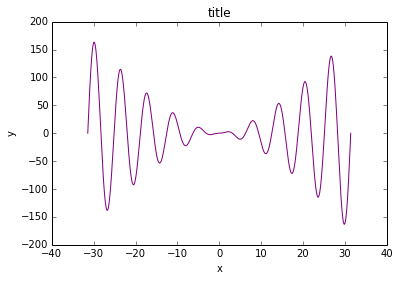

In [17]:
# The following line causes the graph to be displayed inside
# this presentation. It should not be used in regular programs,
# as the regular Python won't recognize it.
%matplotlib inline

import matplotlib.pyplot as plt
import pylab
from math import pi, sin

domain = [ 2*pi * t / 100 for t in range(-500, 501) ]
image = [ abs(x)**1.5 * sin(x) for x in domain ]

pylab.figure()
plt.plot(domain, image, 'purple')
pylab.xlabel('x')
pylab.ylabel('y')
pylab.title('title')
pylab.show()

**Hint:** You don't always have to display the plot. Instead, you can also [save it as an image file](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.savefig).

### NumPy

[NumPy](http://numpy.scipy.org/) offers a very advanced support for multi-dimensional arrays and matrices, along with high-level mathematical functions to operate on them.

The basic object is `ndarray` that incorporates these arrays and it is created by NumPy functions `array`, `arange`, and [many more](http://docs.scipy.org/doc/numpy/reference/routines.array-creation.html). These objects are quite different from Python lists:

* all the elements of `ndarray` must be of the same type,

* all the elements of `ndarray` must occupy a contiguous block of memory,

* (obviously) more than one dimension can be used, so there is no need for "array of arrays" to simulate more than one dimension,

* very advanced (MATLAB-like) indexing.

While some of these features may seem limiting, they actually improve performance and make the code compatible with the code written in faster languages like C and FORTRAN (an old language which is still the backbone of the fastest numerical libraries; the name comes from "FORmula TRANslation").

While NumPy can be imported as any other module (i.e., with `import numpy`), it is customary to import it with an alias `np`:

```python
import numpy as np
```

Functions in NumPy go from "ordinary" [mathematical ones](http://docs.scipy.org/doc/numpy/reference/routines.math.html) applicable to whole arrays (for example, trigonometric, hyperbolic, and rounding functions) and those for [array manipulation](http://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html) (like transpose and reshaping), to those for [discrete Fourier transforms](http://docs.scipy.org/doc/numpy/reference/routines.fft.html), [finance computations](http://docs.scipy.org/doc/numpy/reference/routines.financial.html), [linear algebra](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html), [random sampling](http://docs.scipy.org/doc/numpy/reference/routines.random.html) with support for various probability distributions, [statistics](http://docs.scipy.org/doc/numpy/reference/routines.statistics.html), etc.

The detailed NumPy reference can be found [here](http://docs.scipy.org/doc/numpy/reference/).

**Problem:** Solve the following system of linear equations:

$$\begin{array}{rcrcrcl}
2x &+&  y &+&  3z &=& 1 \\
2x &+& 6y &+&  8z &=& 3 \\
6x &+& 8y &+& 18z &=& 5.
\end{array}$$

If the solution doesn't exist, recognize that case. If there are infinitely many solutions, produce one of them.

In [18]:
import numpy as np

A = np.array([
    [2, 1,  3],
    [2, 6,  8],
    [6, 8, 18]
])
b = np.array([1, 3, 5])
x = np.linalg.solve(A, b)
print("Solution:\n", x)

Solution:
 [  3.00000000e-01   4.00000000e-01  -5.55111512e-17]


Let us verify the solution:

In [19]:
print(np.allclose(np.dot(A, x), b))

True


However, `numpy.linalg.solve` doesn't work if the coefficient matrix $A$ is singular. For example,

$$\begin{array}{rcrcrcl}
2x &+&  y &+&  3z &=& 1 \\
2x &+& 6y &+&  8z &=& 3 \\
6x &+& 3y &+& 9z &=& 5.
\end{array}$$

In [20]:
import numpy as np

A = np.array([
    [2, 1, 3],
    [2, 6, 8],
    [6, 3, 9]
])
b = np.array([1, 3, 5])
x = np.linalg.solve(A, b)
print("Solution:\n", x)

LinAlgError: Singular matrix

Luckily, we can always look for the least-squares best "solution". The function `numpy.linalg.lstsq` returns the vector $x$ of a minimum norm such that $\|Ax - b\|$ is also minimum. Such $x$ may or may not be a solution of the equation $Ax = b$, but it is certainly the closest one in $2$-norm.

Let us find one such $x$ for the above problem:

In [21]:
import numpy as np

A = np.array([
    [2, 1, 3],
    [2, 6, 8],
    [6, 3, 9]
])
b = np.array([1, 3, 5])
x, residuals, rank, s = np.linalg.lstsq(A, b)
print("Solution:\n", x)

Solution:
 [ 0.34666667 -0.03333333  0.31333333]


Let us verify the solution:

In [22]:
print(np.allclose(np.dot(A, x), b))

print(np.dot(A, x) - b)

False
[  6.00000000e-01   4.44089210e-16  -2.00000000e-01]


So, the obtained `x` is not a solution of our system, but it is as close to being one as possible (in terms of the $2$-norm). Hence, we conclude that our system has no solutions (and provide the $x$ that is, in a way, the best one to take the role).

Now, let us now try a singular but consistent system:

$$\begin{array}{rcrcrcl}
2x &+&  y &+&  3z &=& 1 \\
2x &+& 6y &+&  8z &=& 3 \\
6x &+& 3y &+& 9z &=& \!\color{red}{\not\!5}\ 3.
\end{array}$$

Again, `numpy.linalg.solve` will not work because `A` is singular:

In [23]:
import numpy as np

A = np.array([
    [2, 1, 3],
    [2, 6, 8],
    [6, 3, 9]
])
b = np.array([1, 3, 3])
x = np.linalg.solve(A, b)
print("Solution:\n", x)

LinAlgError: Singular matrix

However, using least squares, we can find one $x$ such that $\|Ax-b\|$ is minimum, as we did before:

In [24]:
import numpy as np

A = np.array([
    [2, 1, 3],
    [2, 6, 8],
    [6, 3, 9]
])
b = np.array([1, 3, 3])
x, residuals, rank, s = np.linalg.lstsq(A, b)
print("Solution:\n", x)

Solution:
 [ 0.06666667  0.16666667  0.23333333]


Is this $x$ a solution? Let us check:

In [25]:
print(np.allclose(np.dot(A, x), b))

print(np.dot(A, x) - b)

True
[  8.88178420e-16   1.33226763e-15   2.66453526e-15]


Yes, it is, so we conclude that this system has infinitely many solutions, with the above $x$ being the one of the minimum $2$-norm.

Matrix product is defined by `dot` function, but it can be impractical to use it on bigger formulas. However, the standard product `*` works as the matrix product between matrices defined by `matrix`.

For example, let us verify the following well known special case of the [Woodbury matrix identity](http://en.wikipedia.org/wiki/Woodbury_matrix_identity):

$$({\rm I} + AB)^{-1} = {\rm I} - A({\rm I} + BA)^{-1}B.$$

More precisely, we shall compute

$$X := ({\rm I} + AB)^{-1} - ({\rm I} - A({\rm I} + BA)^{-1}B)$$

for random matrices $A$ and $B$ of order $n$.

In [26]:
import numpy as np
from numpy import linalg as la

n = 3

I = np.matrix(np.identity(n))

while True:
    try:
        A = np.matrix(np.random.rand(n, n))
        B = np.matrix(np.random.rand(n, n))
        X = la.inv(I + A*B) - (I - A * la.inv(I + B*A) * B)
    except LinAlgError:
        # An exception will occur if one or both of the inverted matrices
        # are singular or very near it (very ill-conditioned). In this case,
        # we ignore the error, which will allow the loop to retry with
        # a new pair of random matrices.
        pass
    else:
        print("A =\n", A)
        print("B =\n", B)
        print("X =\n", X)
        print("det X =", la.det(X))
        print("|X|_F =", la.norm(X))
        print("evals(X) =\n", *["    %s\n" % str(x) for x in la.eigvals(X)], end="")
        print("|evals(X)| =", [float("%.3e" % abs(x)) for x in la.eigvals(X)])
        print("min |evals(X)| = %.3e" % min(abs(x) for x in la.eigvals(X)))
        break

A =
 [[ 0.15542543  0.23372871  0.04481062]
 [ 0.12098013  0.73534217  0.01049894]
 [ 0.88187096  0.15327166  0.08771079]]
B =
 [[ 0.73894572  0.64880631  0.55002045]
 [ 0.39019079  0.2541576   0.88252675]
 [ 0.0051103   0.38396904  0.95885618]]
X =
 [[  1.11022302e-16  -6.93889390e-18   2.77555756e-17]
 [  2.77555756e-17   0.00000000e+00   1.11022302e-16]
 [  5.55111512e-17   1.11022302e-16  -1.11022302e-16]]
det X = -1.34707341389e-48
|X|_F = 2.32323452737e-16
evals(X) =
     6.02024694174e-17
     1.22482516904e-16
     -1.82684986322e-16
|evals(X)| = [6.02e-17, 1.225e-16, 1.827e-16]
min |evals(X)| = 6.020e-17


### SciPy library

[SciPy library](http://docs.scipy.org/doc/scipy/reference/) has some overlap with NumPy, for example in [linear algebra](http://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html) and [statistics](http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html) functions. This difference is best described by [SciPy's FAQ](http://www.scipy.org/scipylib/faq.html#what-is-the-difference-between-numpy-and-scipy):

> #### What is the difference between NumPy and SciPy?

> In an ideal world, NumPy would contain nothing but the array data type and the most basic operations: indexing, sorting, reshaping, basic elementwise functions, et cetera. All numerical code would reside in SciPy. However, one of NumPy’s important goals is compatibility, so NumPy tries to retain all features supported by either of its predecessors. Thus NumPy contains some linear algebra functions, even though these more properly belong in SciPy. In any case, SciPy contains more fully-featured versions of the linear algebra modules, as well as many other numerical algorithms. If you are doing scientific computing with python, you should probably install both NumPy and SciPy. Most new features belong in SciPy rather than NumPy.

Let us repeat the previous example using the functions from SciPy library:

In [27]:
import numpy as np
from scipy import linalg as la

n = 3

I = np.matrix(np.identity(n))

while True:
    try:
        A = np.matrix(np.random.rand(n, n))
        B = np.matrix(np.random.rand(n, n))
        X = la.inv(I + A*B) - (I - A * la.inv(I + B*A) * B)
    except LinAlgError:
        # An exception will occur if one or both of the inverted matrices
        # are singular or very near it (very ill-conditioned). In this case,
        # we ignore the error, which will allow the loop to retry with
        # a new pair of random matrices.
        pass
    else:
        print("A =\n", A)
        print("B =\n", B)
        print("X =\n", X)
        print("det X =", la.det(X))
        print("|X|_F =", la.norm(X))
        print("evals(X) =\n", *["    %s\n" % str(x) for x in la.eigvals(X)], end="")
        print("|evals(X)| =", [float("%.3e" % abs(x)) for x in la.eigvals(X)])
        print("min |evals(X)| = %.3e" % min(abs(x) for x in la.eigvals(X)))
        break

A =
 [[ 0.57035626  0.39711871  0.91761278]
 [ 0.00964693  0.98443981  0.61974803]
 [ 0.69922559  0.87881829  0.35047373]]
B =
 [[ 0.24316298  0.7116132   0.89053149]
 [ 0.35254371  0.65245094  0.21809409]
 [ 0.80378795  0.03935574  0.8740063 ]]
X =
 [[  0.00000000e+00  -4.51028104e-17  -5.55111512e-17]
 [  0.00000000e+00   0.00000000e+00  -2.77555756e-17]
 [  0.00000000e+00  -1.11022302e-16   0.00000000e+00]]
det X = 0.0
|X|_F = 1.34952121275e-16
evals(X) =
     0j
     (-5.55111512313e-17+0j)
     (5.55111512313e-17+0j)
|evals(X)| = [0.0, 5.551e-17, 5.551e-17]
min |evals(X)| = 0.000e+00


It is always better to go with the SciPy library functions than their NumPy equivalents, unless the deployment systems are not expected to have the SciPy library installed.

### Probability distributions

Do not hesitate to look on the internet how to solve a problem. However, do remember to properly attribute the code you borrow.

Here, we plot the normal distribution on the sets of $10^2$, $10^3$, $10^4$, and $10^5$ randomly chosen points grouped in $100$ "buckets" and normalized to achieve the same scale, based on [this example](http://stackoverflow.com/a/15415632/1667018).

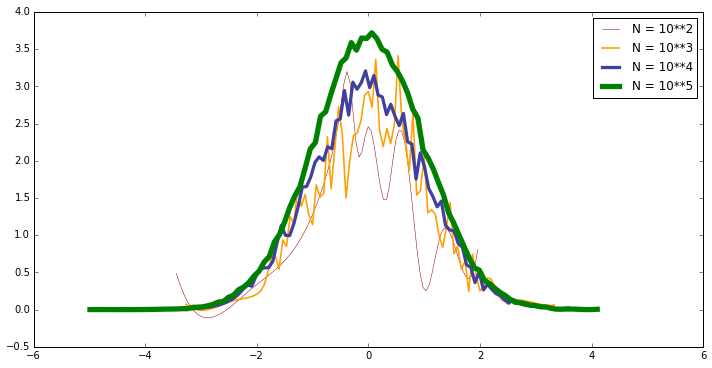

In [28]:
%matplotlib inline

import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt

colors = ('#a00000', '#ffa000', '#4040a0', '#008000')
n = 100
plt.figure(figsize=(12,6), dpi=100)

for k in range(2,6):
    # The following is a slight modification of askewchan's code from
    # http://stackoverflow.com/a/15415632/1667018
    N = 10**k
    s = np.random.normal(size=N)   # generate your data sample with N elements
    p, x = np.histogram(s, bins=n) # bin it into n = N/10 bins
    x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
    f = UnivariateSpline(x, p, s=n)
    plt.plot(
        x, f(x) / 10**(k-2),
        label="N = 10**%d" % k,
        color=colors[k-2],
        linewidth=(k-1)**1.7/2
    )

plt.legend()
plt.show()